<a href="https://colab.research.google.com/github/Fuad-Khan/2_Class_Religious_Abuse_Models/blob/main/2_Class_Religious_Traditional_ML_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

In [8]:
# Step 1: Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import pickle

# Step 2: Load the 2-class dataset
file_path = "/content/drive/MyDrive/Research Paper/Data Preprocessing/2 Class/Cleaned_Labeled_Religious_Comments_Numeric.csv"
df = pd.read_csv(file_path)

# Step 3: Define text and label columns
text_column = 'comment'
label_column = 'label_numeric'  # binary: 0 = Normal, 1 = Religious Abuse

# Step 4: Train-test split
X = df[text_column].astype(str)
y = df[label_column].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 6: Train Logistic Regression for binary
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Step 7: Evaluate the model
y_pred = model.predict(X_test_tfidf)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=['Normal', 'Religious Abuse']))

# Step 8: Save the model and vectorizer
with open("/content/drive/MyDrive/Research Paper/Models/2 Class/Traditional ML Models/Riligious_logistic_model_binary.pkl", "wb") as f:
    pickle.dump(model, f)

with open("/content/drive/MyDrive/Research Paper/Models/2 Class/Traditional ML Models/logistic_tfidf_vectorizer_binary.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

print("✅ Binary model and vectorizer saved.")


✅ Accuracy: 0.7972972972972973
📊 Classification Report:
                  precision    recall  f1-score   support

         Normal       0.82      0.91      0.86      3648
Religious Abuse       0.71      0.53      0.61      1532

       accuracy                           0.80      5180
      macro avg       0.77      0.72      0.74      5180
   weighted avg       0.79      0.80      0.79      5180

✅ Binary model and vectorizer saved.


# SVM

In [9]:
# Step 1: Install required library for saving model
!pip install -q joblib

# Step 2: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Step 3: Load the dataset
file_path = "/content/drive/MyDrive/Research Paper/Data Preprocessing/2 Class/Cleaned_Labeled_Religious_Comments_Numeric.csv"
df = pd.read_csv(file_path)

# Optional: Check for label consistency
print("✅ Label Classes:", df['label_numeric'].unique())

# Step 4: Define feature and numeric label columns
X = df['comment'].astype(str)
y = df['label_numeric'].astype(int)

# Step 5: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 7: Train SVM model (binary classification with linear kernel)
svm_model = SVC(kernel='linear')  # Binary classifier
svm_model.fit(X_train_tfidf, y_train)

# Step 8: Evaluate model
y_pred = svm_model.predict(X_test_tfidf)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ Classification Report:\n", classification_report(y_test, y_pred, target_names=['Normal', 'Religious Abuse']))

# Step 9: Save model and vectorizer
joblib.dump(svm_model, '/content/drive/MyDrive/Research Paper/Models/2 Class/Traditional ML Models/Religious_svm_model.joblib')
joblib.dump(vectorizer, '/content/drive/MyDrive/Research Paper/Models/2 Class/Traditional ML Models/svm_tfidf_vectorizer.joblib')

print("🎉 Model saved as 'Religious_svm_model.joblib'")
print("🎉 Vectorizer saved as 'svm_tfidf_vectorizer.joblib'")


✅ Label Classes: [0 1]
✅ Accuracy: 0.7974903474903475
✅ Classification Report:
                  precision    recall  f1-score   support

         Normal       0.82      0.91      0.86      3648
Religious Abuse       0.71      0.54      0.61      1532

       accuracy                           0.80      5180
      macro avg       0.77      0.72      0.74      5180
   weighted avg       0.79      0.80      0.79      5180

🎉 Model saved as 'Religious_svm_model.joblib'
🎉 Vectorizer saved as 'svm_tfidf_vectorizer.joblib'


# Random Forest model

✅ Accuracy: 0.7915057915057915
✅ Classification Report:
                  precision    recall  f1-score   support

         Normal       0.80      0.93      0.86      3648
Religious Abuse       0.74      0.45      0.56      1532

       accuracy                           0.79      5180
      macro avg       0.77      0.69      0.71      5180
   weighted avg       0.78      0.79      0.77      5180



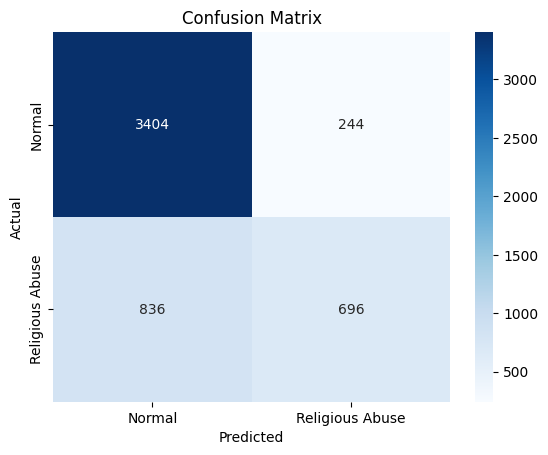

✅ Model saved at: /content/drive/MyDrive/Research Paper/Models/2 Class/Traditional ML Models/RF_religious_abuse_model.joblib
✅ Vectorizer saved at: /content/drive/MyDrive/Research Paper/Models/2 Class/Traditional ML Models/RF_tfidf_vectorizer.joblib


In [10]:
# Step 1: Install joblib (only needed in Colab or if not installed)
!pip install -q joblib

# Step 2: Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: Load dataset
file_path = "/content/drive/MyDrive/Research Paper/Data Preprocessing/2 Class/Cleaned_Labeled_Religious_Comments_Numeric.csv"
df = pd.read_csv(file_path)

# Step 4: Filter to only 2 classes if needed (0 = Normal, 1 = Religious Abuse)
df = df[df['label_numeric'].isin([0, 1])]  # ✅ Ensure binary classification

# Step 5: Define columns
text_column = 'comment'
label_column = 'label_numeric'

# Step 6: Split data
X = df[text_column].astype(str)
y = df[label_column].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 8: Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Step 9: Evaluate model
y_pred = rf_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Normal', 'Religious Abuse'])

print("✅ Accuracy:", accuracy)
print("✅ Classification Report:\n", report)

# Step 10: Confusion Matrix (optional)
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Religious Abuse'], yticklabels=['Normal', 'Religious Abuse'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 11: Save model and vectorizer
model_path = '/content/drive/MyDrive/Research Paper/Models/2 Class/Traditional ML Models/RF_religious_abuse_model.joblib'
vectorizer_path = '/content/drive/MyDrive/Research Paper/Models/2 Class/Traditional ML Models/RF_tfidf_vectorizer.joblib'

joblib.dump(rf_model, model_path)
joblib.dump(vectorizer, vectorizer_path)

print("✅ Model saved at:", model_path)
print("✅ Vectorizer saved at:", vectorizer_path)
